# Taming Text with string2string: A Powerful Python Library for String-to-String Algorithms
## Leverage string2string for Natural Language Processing Tasks
This notebook is accompanying the article https://ealizadeh.com/blog/tutorial-string2string/.


**Website:** https://ealizadeh.com

**Medium:** https://medium.com/@ealizadeh

**Twitter:** https://twitter.com/es_alizadeh

**Copyright © 2023 Esmaeil Alizadeh**

![](https://ealizadeh.com/blog/tutorial-string2string/img/_featured_image.png)

# Introduction

The `string2string` library is an open-source tool that has a full set of efficient methods for string-to-string problems.^[Visit the library's [GitHub Page](https://github.com/stanfordnlp/string2string).]
String pairwise alignment, distance measurement, lexical and semantic search, and similarity analysis are all covered in this library. 
Additionally, a variety of useful visualization tools and metrics that make it simpler to comprehend and evaluate the findings of these approaches are also included.

The library has well-known algorithms like the Smith-Waterman, Hirschberg, Wagner-Fisher, BARTScore, BERTScore, Knuth-Morris-Pratt, and Faiss search. 
It can be used for many jobs and problems in natural-language processing, bioinformatics, and computer social studies [1].

The [Stanford NLP group](https://nlp.stanford.edu/), which is part of the Stanford AI Lab, has developed the library and introduced it in 1.
The library's GitHub repository has several [tutorials](https://github.com/stanfordnlp/string2string/tree/main#tutorials) that you may find useful. 


A *string* is a sequence of characters (letters, numbers, and symbols) that stands for a piece of data or text. 
From everyday phrases to DNA sequences, and even computer programs, strings may be used to represent just about everything [1]. 



## Installation
You can install the library via pip by running `pip install string2string`.

# Pairwise Alignment

String pairwise alignment is a method used in NLP and other disciplines to compare two strings, or sequences of characters, by highlighting their shared and unique characteristics. 
The two strings are aligned, and a similarity score is calculated based on the number of shared characters, as well as the number of shared gaps and mismatches. 
This procedure is useful for locating sequences of characters that share similarities and calculating the "distance" between two sets of strings. 
Spell checking, text analysis, and bioinformatics sequence comparison (e.g., DNA sequence alignment) are just some of the many uses for it.

Currently, the `string2string` package provides the following alignment techniques:

* Needleman-Wunsch for global alignment
* Smith-Waterman for local alignment
* Hirchberg's algorithm for linear space global alignment
* Longest common subsequence
* Longest common substring
* Dynamic time warping (DTW) for time series alignment

In this post, we'll look at two examples: one for global alignment and one for time series alignment.

## Needleman-Wunsch Algorithm for Global Alignment
The Needleman-Wunsch algorithm is a type of dynamic programming algorithm that is often used in bioinformatics to match two DNA or protein sequences, globally. 


In [1]:
#| label: stdout-alignment-nw
from string2string.alignment import NeedlemanWunsch

nw = NeedlemanWunsch()

# Define two sequences
s1 = 'ACGTGGA'
s2 = 'AGCTCGC'

aligned_s1, aligned_s2, score_matrix = nw.get_alignment(s1, s2, return_score_matrix=True)

print(f'The alignment between "{s1}" and "{s2}":')
nw.print_alignment(aligned_s1, aligned_s2)

The alignment between "ACGTGGA" and "AGCTCGC":
A | C | G | - | T | G | G | A
A | - | G | C | T | C | G | C


For a more informative comparison, we can use `plot_pairwise_alignment()` function in the library.


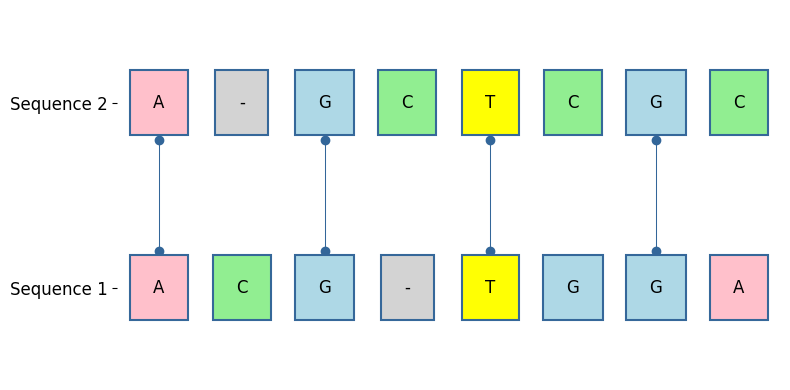

In [2]:
#| label: fig-alignment-nw-plot
#| fig-cap: Global alignment between ACGTGGA and AGCTCGC
from string2string.misc.plotting_functions import plot_pairwise_alignment

path, s1_pieces, s2_pieces = nw.get_alignment_strings_and_indices(aligned_s1, aligned_s2)

plot_pairwise_alignment(
    seq1_pieces=s1_pieces,
    seq2_pieces=s2_pieces,
    alignment=path,
    str2colordict={
        "A": "pink", 
        "G": "lightblue", 
        "C": "lightgreen", 
        "T": "yellow", 
        "-": "lightgray"
    },
    title="",
    seq1_name="Sequence 1",
    seq2_name="Sequence 2",
)

## Dynamic Time Warping 
DTW is a useful tool to compare two time series that might differ in speed, duration, or both. 
It discovers the path across these distances that minimizes the total difference between the sequences by calculating the "distance" between each pair of points in the two sequences.

Let's go over an example using the `alignment` module in the `string2string` library.


In [3]:
#| label: stdout-alignment-dtw-path
from string2string.alignment import DTW

dtw = DTW()

x = [3, 1, 2, 2, 1]
y = [2, 0, 0, 3, 3, 1, 0]

dtw_path = dtw.get_alignment_path(x, y, distance="square_difference")
print(f"DTW path: {dtw_path}")

DTW path: [(0, 0), (1, 1), (1, 2), (2, 3), (3, 4), (4, 5), (4, 6)]


Above is an example borrowed from my previous post, *[An Illustrative Introduction to Dynamic Time Warping](https://ealizadeh.com/blog/introduction-to-dynamic-time-warping/#example-1)*.
For those looking to delve deeper into the topic, in [2], I explained the core concepts of DTW in a visual and accessible way.


# Search Problems

String search is the task of finding a pattern substring within another string. 
The library offers two types of search algorithms: lexical search and semantic search. 

## Lexical Search (exact-match search)

Lexical search, in layman's terms, is the act of searching for certain words or phrases inside a text, analogous to searching for a word or phrase in a dictionary or a book. 

Instead of trying to figure out what a string of letters or words means, it just tries to match them exactly.
When it comes to search engines and information retrieval, lexical search is a basic strategy to finding relevant resources based on the keywords or phrases users enter, without any attempt at comprehending the linguistic context of the words or phrases in question.

Currently, the `string2string` library provides the following lexical search algorithm:

* Naive (brute-force) search algorithm
* Rabin-Karp search algorithm
* Knuth-Morris-Pratt (KMP) search algorithm (see the example below)
* Boyer-Moore search algorithm


In [4]:
#| label: stdout-search-kmp
from string2string.search import KMPSearch

kmp_search = KMPSearch()

pattern = "Redwood tree"
text = "The gentle fluttering of a Monarch butterfly, the towering majesty of a Redwood tree, and the crashing of ocean waves are all wonders of nature."

idx = kmp_search.search(pattern=pattern, text=text)

print(f"The starting index of pattern: {idx}")
print(f'The pattern (± characters) inside the text: "{text[idx-5: idx+len(pattern)+5]}"')

The starting index of pattern: 72
The pattern (± characters) inside the text: "of a Redwood tree, and"


## Semantic Search
Semantic search is a more sophisticated method of information retrieval that goes beyond simple word or phrase searches. 
It employs NLP (natural language processing) to decipher a user's intent and return accurate results.

To put it another way, let's say you're interested in "how to grow apples." 
While a lexical search may produce results including the terms "grow" and "apples," a semantic search will recognize that you are interested in the cultivation of apple trees and deliver results accordingly. 
The search engine would then prioritize results that not only included the phrases it was looking for but also gave relevant information about planting, trimming, and harvesting apple trees.

### Semantic Search via Faiss

Faiss (Facebook AI Similarity Search) is an efficient similarity search tool that is useful for dealing with high-dimensional data with numerical representations [3]. 
The `string2string` library has a wrapper for the FAISS library developed by Facebook (see [GitHub repository](https://github.com/facebookresearch/faiss)).

In short, Faiss search ranks its results based on a "score," representing the degree to which two objects are similar to one another. 
The score makes it possible to interpret and prioritize search results based on how close/relevant they are to the desired target.

Let's see how the Faiss search is used in the `string2string` library.
Here, we have a corpus^[A corpus (plural of corpora) is a large and structured collections of texts used for linguistic research, NLP and ML applications.] of 11 sentences, and we will do a semantic search by querying a target sentence to see how close/relevant it is to these sentences. 


In [5]:
corpus = {"text": [
    "A warm cup of tea in the morning helps me start the day right.",
    "Staying active is important for maintaining a healthy lifestyle.",
    "I find inspiration in trying out new activities or hobbies.",
    "The view from my window is always a source of inspiration.",
    "The encouragement from my loved ones keeps me going.",
    "The novel I've picked up recently has been a page-turner.",
    "Listening to podcasts helps me stay focused during work.",
    "I can't wait to explore the new art gallery downtown.",
    "Meditating in a peaceful environment brings clarity to my thoughts.",
    "I believe empathy is a crucial quality to possess.",
    "I like to exercise a few times a week."
    ]
}

query = "I enjoy walking early morning before I start my work."

Let's initialize the `FaissSearch` object. 
Facebook's BART Large model is the default model and tokenizer for the `FaissSearch` object.

In [6]:
#| output: false
from string2string.search import FaissSearch

faiss_search = FaissSearch(
    model_name_or_path = "facebook/bart-large",
    tokenizer_name_or_path = "facebook/bart-large",
)

faiss_search.initialize_corpus(
    corpus=corpus,
    section="text", 
    embedding_type="mean_pooling",
)

Map:   0%|          | 0/11 [00:00<?, ? examples/s]

Adding FAISS index...


  0%|          | 0/1 [00:00<?, ?it/s]

Dataset({
    features: ['text', 'embeddings'],
    num_rows: 11
})

Let's find the top 3 most similar sentences in the corpus to the query and print them, as well as their similarity scores.


In [7]:
#| label: stdout-search-faiss-top-results
top_k_similar_answers = 3
most_similar_results = faiss_search.search(
    query=query,
    k=top_k_similar_answers,
)
    
print(f"Query: {query}\n")
for i in range(top_k_similar_answers):
    print(f'Result {i+1} (score={most_similar_results["score"][i]:.2f}): "{most_similar_results["text"][i]}"')

Query: I enjoy walking early morning before I start my work.

Result 1 (score=208.49): "I find inspiration in trying out new activities or hobbies."
Result 2 (score=218.21): "I like to exercise a few times a week."
Result 3 (score=225.96): "I can't wait to explore the new art gallery downtown."


# Distance

String distance is the task of quantifying the degree to which two supplied strings differ using a distance function.
Currently, the `string2string` library offers the following distance functions:

* Levenshtein edit distance
* Damerau-Levenshtein edit distance
* Hamming distance
* Jaccard distance^[Not to be confused with Jaccard similarity coefficient. Jaccard distance = 1 - Jaccard coefficient]

## Levenshtein edit distance

Levenshtein edit distance, or simply the edit distance, is the minimal number of insertions, deletions, or substitutions needed to convert one string into another.


In [8]:
#| label: stdout-distance-edit
from string2string.distance import LevenshteinEditDistance

edit_dist = LevenshteinEditDistance()

# Create two strings
s1 = "The beautiful cherry blossoms bloom in the spring time."
s2 = "The beutiful cherry blosoms bloom in the spring time."

# Let's compute the edit distance between the two strings and measure the computation time
edit_dist_score  = edit_dist.compute(s1, s2, method="dynamic-programming")

print(f'The distance between the following two sentences is {edit_dist_score}:') #\n- "{s1}"\n- "{s2}"')
print(f'"The beautiful cherry blossoms bloom in the spring time."')
print(f'"The beutiful cherry blosoms bloom in the spring time."')

The distance between the following two sentences is 2.0:
"The beautiful cherry blossoms bloom in the spring time."
"The beutiful cherry blosoms bloom in the spring time."


## Jaccard Index

The Jaccard index can be used to quantify the similarity between sets of words or tokens and is commonly used in tasks such as document similarity or topic modeling. 
For example, the Jaccard index can be used to measure the overlap between the sets of words in two different documents or to identify the most similar topics across a collection of documents.


In [9]:
#| label: stdout-distance-jaccard
from string2string.distance import JaccardIndex 

jaccard_dist = JaccardIndex()

# Suppose we have two documents
doc1 = ["red", "green", "blue", "yellow", "purple", "pink"]
doc2 = ["green", "orange", "cyan", "red"]

jaccard_dist_score = jaccard_dist.compute(doc1, doc2)

print(f"Jaccard distance between doc1 and doc2: {jaccard_dist_score:.2f}")

Jaccard distance between doc1 and doc2: 0.75


# Similarity

To put it simply, string similarity determines the degree to which two strings of text (or sequences of characters) are linked or similar to one another.
Take, as an example, the following pair of sentences:

* "The cat sat on the mat."
* "The cat was sitting on the rug."

Although not identical, these statements share vocabulary and convey a connected sense.
Methods based on string similarity analysis reveal and quantify the degree of similarity between such text pairings.


**NOTE:** There is a *duality* between string *similarity* and *distance* measures, meaning that they can be used interchangeably (see [1]). 


The `similarly` module of the `string2string` library currently offers the following algorithms:

* Cosine similarity
* BERTScore
* BARTScore
* Jaro similarity
* LCSubsequence similarity

Let's go over an example of the BERTScore similarity algorithm with the following four sentences: 

1. The bakery sells a variety of delicious pastries and bread.
2. The park features a playground, walking trails, and picnic areas.
3. The festival showcases independent movies from around the world.
4. A range of tasty bread and pastries are available at the bakery.

Sentences 1 and 2 are similar semantically as both are about bakery and pastry. 
Hence, we should expect a high similarity score between the two.

Let's implement the above example in the library.

In [10]:
#| output: false

from string2string.similarity import BERTScore
from string2string.misc import ModelEmbeddings

bert_score = BERTScore(model_name_or_path="bert-base-uncased")
bart_model = ModelEmbeddings(model_name_or_path="facebook/bart-large")

sentences = [
    "The bakery sells a variety of delicious pastries and bread.", 
    "The park features a playground, walking trails, and picnic areas.", 
    "The festival showcases independent movies from around the world.", 
    "A range of tasty bread and pastries are available at the bakery.", 
]

embeds = [
    bart_model.get_embeddings(
        sentence, embedding_type='mean_pooling'
    ) for sentence in sentences
]

# Define source and target sentences (to compute BERTScore for each pair)
source_sentences, target_sentences = [], []
for i in range(len(sentences)):
    for j in range(len(sentences)):
        source_sentences.append(sentences[i])
        target_sentences.append(sentences[j])

bertscore_similarity_scores = bert_score.compute(
    source_sentences,
    target_sentences,
)
bertscore_precision_scores = bertscore_similarity_scores['precision'].reshape(
    len(sentences), len(sentences)
)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


We can visualize the similarity between every pair of sentences using the `plot_heatmap()` function provided in the library. 


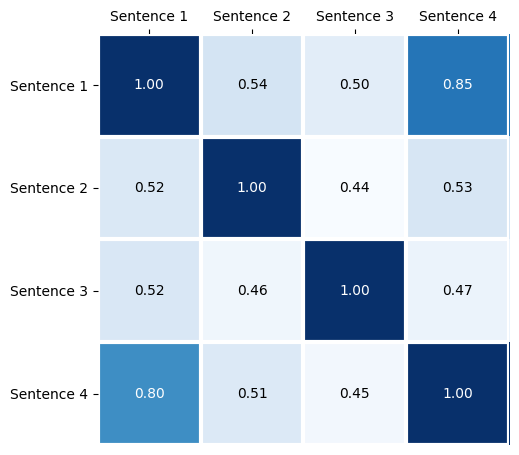

In [11]:
#| label: fig-similarity-bertscore-heatmap
#| fig-cap: Semantic similarity (BERTScore) between sentences
#| fig-alt: Semantic similarity (BERTScore) between sentences
from string2string.misc.plotting_functions import plot_heatmap

plot_ticks = [f"Sentence {i + 1}" for i in range(len(sentences))]

# We can also visualize the BERTScore similarity scores using a heatmap
plot_heatmap(
    bertscore_precision_scores,
    title="",
    x_ticks=plot_ticks,
    y_ticks=plot_ticks,
    x_label="",
    y_label="",
    valfmt="{x:.2f}",
    cmap="Blues",
)

As can be seen above, sentences 1 and 4 are much more similar (using the BERTScore algorithm) as we expected. 


# Conclusion

The `string2string` Python library is an open-source tool that provides a full set of efficient methods for string-to-string problems. 
In particular, the library has four main modules that address the following tasks: 1. *pairwise alignment* including both global and local alignments; 2. *distance measurement*; 3. *lexical and semantic search*; and 4. *similarity analysis*. 
The library offers various algorithms in each category and provides helpful visualization tools. 